<a href="https://colab.research.google.com/github/saikiran162005/Predictive-Analysis/blob/main/Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (100, 18)
Columns: ['Departure City', 'Arrival City', 'Departure Date', 'Flight Duration', 'Delay Minutes', 'Customer ID', 'Name', 'Booking Class', 'Frequent Flyer Status', 'Route', 'Ticket Price', 'Competitor Price', 'Demand', 'Origin', 'Destination', 'Profitability', 'Loyalty Points', 'Churned']

Model Performance:
                        Model  Accuracy
2         K-Nearest Neighbors      0.70
3                 Naive Bayes      0.50
4               Decision Tree      0.50
5      Support Vector Machine      0.45
1         Logistic Regression      0.40
0  Multiple Linear Regression      0.40


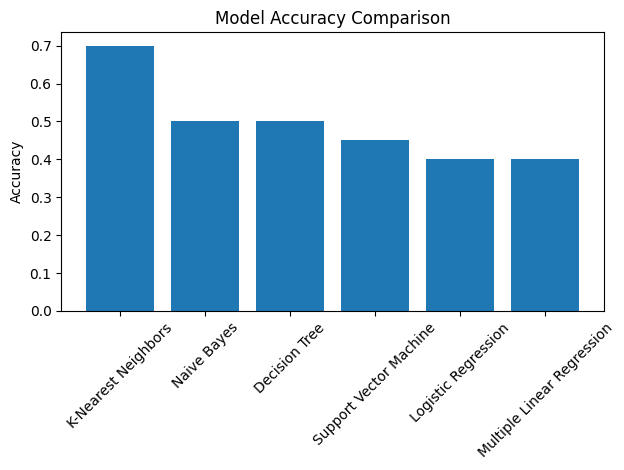


Best Model: K-Nearest Neighbors with accuracy 0.70


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# 1. LOAD DATA
data = pd.read_csv("Flight_data.csv")

print("Dataset shape:", data.shape)
print("Columns:", data.columns.tolist())


# 2. DEFINE FEATURES & TARGET
target_column = data.columns[-1]

X = data.drop(columns=[target_column])
y = data[target_column]


# 3. ENCODE TARGET IF NEEDED
if y.dtype == "object":
    y = LabelEncoder().fit_transform(y)

# ------------------------------
# 4. ENCODE CATEGORICAL FEATURES
# ------------------------------
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = LabelEncoder().fit_transform(X[col])

# ------------------------------
# 5. TRAIN-TEST SPLIT
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 6. FEATURE SCALING
# ------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ------------------------------
# 7. DEFINE MODELS
# ------------------------------
models = {
    "Multiple Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC()
}

# ------------------------------
# 8. TRAIN & EVALUATE
# ------------------------------
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Linear regression is not a classifier
    if name == "Multiple Linear Regression":
        predictions = np.round(predictions)

    acc = accuracy_score(y_test, predictions)
    accuracies[name] = acc

# ------------------------------
# 9. RESULTS TABLE
# ------------------------------
results = pd.DataFrame({
    "Model": list(accuracies.keys()),
    "Accuracy": list(accuracies.values())
}).sort_values(by="Accuracy", ascending=False)

print("\nModel Performance:")
print(results)

# ------------------------------
# 10. VISUALIZATION
# ------------------------------
plt.figure()
plt.bar(results["Model"], results["Accuracy"])
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

# ------------------------------
# 11. BEST MODEL
# ------------------------------
best_model = results.iloc[0]
print(
    f"\nBest Model: {best_model['Model']} "
    f"with accuracy {best_model['Accuracy']:.2f}"
)
